In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

df = pd.read_csv("baseball_players.csv")
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [2]:
df["Team"].value_counts()

NYM    38
ATL    37
OAK    37
DET    37
CHC    36
BOS    36
WAS    36
PHI    36
CIN    36
PIT    35
MLW    35
COL    35
BAL    35
ANA    35
CLE    35
TEX    35
KC     35
HOU    34
SEA    34
SF     34
TOR    34
SD     33
MIN    33
LA     33
TB     33
CWS    33
NYY    32
FLA    32
STL    32
ARZ    28
Name: Team, dtype: int64

In [3]:
df["Position"].value_counts()

Relief_Pitcher       315
Starting_Pitcher     221
Outfielder           194
Catcher               76
Second_Baseman        58
First_Baseman         55
Shortstop             52
Third_Baseman         45
Designated_Hitter     18
Name: Position, dtype: int64

In [4]:
df = df.dropna()

Text(0.5, 1.0, 'Label')

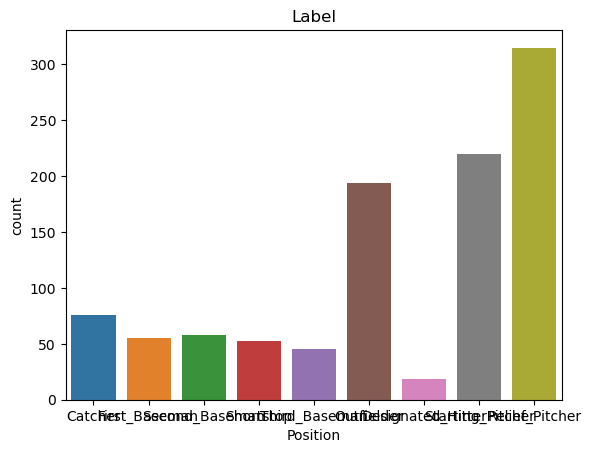

In [5]:
sns.countplot(data = df, x="Position")
plt.title("Label")

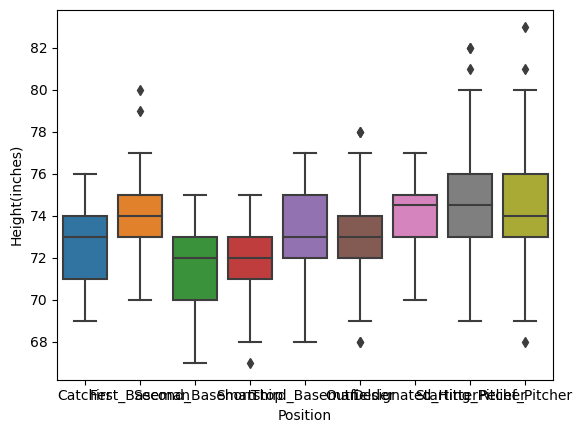

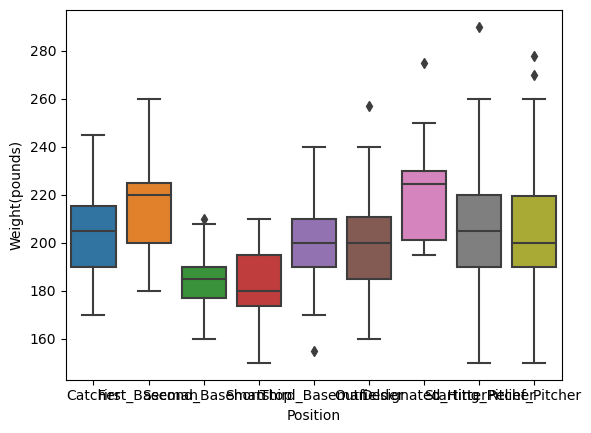

In [6]:
sns.boxplot(y='Height(inches)', x='Position', data=df)
plt.show()
sns.boxplot(y='Weight(pounds)', x='Position', data=df)
plt.show()

TypeError: 'Index' object is not callable

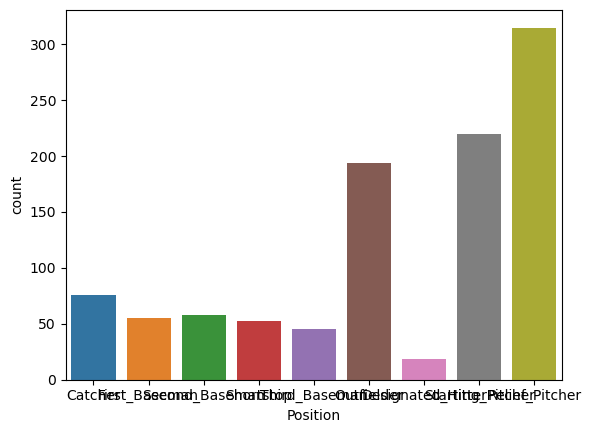

In [7]:
sns.countplot(x = 'Position', data = df)
order = df.Position.value_counts().index()
plt.title("Records per position")

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Position"] = le.fit_transform(df["Position"])

df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,2,72,210.0,35.43
4,Chris_Gomez,BAL,2,73,188.0,35.71


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Team"] = le.fit_transform(df["Team"])

df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,3,0,74,180.0,22.99
1,Paul_Bako,3,0,74,215.0,34.69
2,Ramon_Hernandez,3,0,72,210.0,30.78
3,Kevin_Millar,3,2,72,210.0,35.43
4,Chris_Gomez,3,2,73,188.0,35.71


TypeError: 'Int64Index' object is not callable

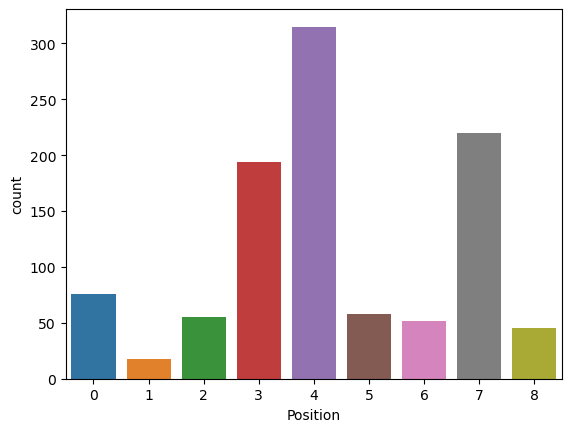

In [10]:
sns.countplot(x = 'Position', data = df)
order = df.Position.value_counts().index()
plt.title("Records per position")

In [14]:
from sklearn.model_selection import train_test_split

X=df.drop(['Team', 'Name', 'Position'] ,axis=1)
y=df['Position']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
# Decision Tree 회귀
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
print("Decision Tree 회귀 MSE: {:.4f}".format(dt_mse))

Decision Tree 회귀 MSE: 8.6448


In [17]:
# Random Forest 회귀
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest 회귀 MSE: {:.4f}".format(rf_mse))

Random Forest 회귀 MSE: 5.3498


In [20]:
# Linear Regression 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression 회귀 MSE: {:.4f}".format(lr_mse))

Linear Regression 회귀 MSE: 4.6262


In [19]:
# SVM 회귀
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
svm_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
print("SVM 회귀 MSE: {:.4f}".format(svm_mse))

SVM 회귀 MSE: 4.9176


In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.23552123552123552


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.23938223938223938
